# Querying data using the gget cellxgene module

gget is a free, open-source command-line tool and Python package that enables efficient querying of genomic databases. gget consists of a collection of separate but interoperable modules, each designed to facilitate one type of database querying in a single line of code.

In [75]:
import gget
gget.setup("cellxgene")

# Display all options of the cellxgene gget module
help(gget.cellxgene)

20:35:20 - INFO - Installing cellxgene-census package (requires pip).
20:35:21 - INFO - cellxgene_census installed succesfully.


Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], meta_only=False, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, census_version='stable', verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).

    NOTE: Querying large datasets requires

# Fetch an AnnData object by selecting gene(s), tissue(s) and cell type(s)

In [76]:
adata_homo = gget.cellxgene(
    meta_only=False,
    ensembl=False,  # Setting 'ensembl=True' here since the gene is passed as an Ensembl ID
    # collection_id="",
    # dataset_id = "700aed19-c16e-4ba8-9191-07da098a8626",
    # gene=["ENSG00000197405","ENSG00000171860","ENSG00000000971"],
    species="homo_sapiens",
    disease="normal",
    suspension_type="cell",
    # assay=["10x 3' v3"],
    tissue="brain",
    cell_type="microglial cell",
    gene=["CFH", "C5AR1", "C3AR1"],
)

# adata_homo

20:35:21 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/gget/gget_cellxgene.py:189: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


AnnData object with n_obs × n_vars = 128 × 3
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

In [142]:
adata_mus = gget.cellxgene(
    meta_only=False,
    ensembl=False,  # Setting 'ensembl=True' here since the gene is passed as an Ensembl ID
    # collection_id="",
    # dataset_id = "700aed19-c16e-4ba8-9191-07da098a8626",
    # gene=["ENSG00000197405","ENSG00000171860","ENSG00000000971"],
    # assay=["10x 3' v3"],
    species="mus_musculus",  # Let's switch up the species
    disease="normal",
    suspension_type="cell",
    # assay=["10x 3' v3"],
    tissue="brain",
    cell_type="microglial cell",
    gene=["Cfh", "C5ar1", "C3ar1"],
)

# adata_mus

22:19:23 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/gget/gget_cellxgene.py:189: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


AnnData object with n_obs × n_vars = 13268 × 3
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

# Convert mus_musculus 'feature_name' entries to match homo_sapiens

In [143]:
import anndata as ad
import pandas as pd

# Convert AnnData object to DataFrame
df_var = adata_mus.var.copy()
df_obs = adata_mus.obs.copy()
df_X = pd.DataFrame(adata_mus.X.toarray(), index=adata_mus.obs.index, columns=adata_mus.var.index)

# Modify the feature_name entries to uppercase
df_var['feature_name'] = df_var['feature_name'].str.upper()

# Convert the DataFrame back to an AnnData object
adata_mus = ad.AnnData(X=df_X.values, var=df_var, obs=df_obs)

# Verify the changes
adata_mus.var

,soma_joinid,feature_id,feature_name,feature_type,feature_length,nnz,n_measured_obs
0,1029,ENSMUSG00000040552,C3AR1,protein_coding,4305,317588,42636109
1,13238,ENSMUSG00000049130,C5AR1,protein_coding,2481,422091,42757016
2,15169,ENSMUSG00000026365,CFH,protein_coding,3923,2085471,42776863


# Combine adata_homo and adata_mus + add column for species

In [210]:
import pandas as pd

# Add column for species
adata_homo.var['species'] = "homo_sapiens"
adata_homo.obs['species'] = "homo_sapiens"
adata_mus.var['species'] = "mus_musculus"
adata_mus.obs['species'] = "mus_musculus"

# Convert AnnData var objects to DataFrames
df_var_homo = adata_homo.var.copy()
df_var_mus = adata_mus.var.copy()

# Concatenate the DataFrames
df_var_combined = pd.concat([df_var_homo, df_var_mus])

# Convert AnnData obs objects to DataFrames
df_obs_homo = adata_homo.obs.copy()
df_obs_mus = adata_mus.obs.copy()

# Concatenate the DataFrames
df_obs_combined = pd.concat([df_obs_homo, df_obs_mus])

# Create an AnnData object
adata_combined = ad.AnnData(var=df_var_combined, obs=df_obs_combined)

# Reset the index of var and obs DataFrames
adata_combined.var.reset_index(drop=True, inplace=True)
adata_combined.obs.reset_index(drop=True, inplace=True)

# Verify the AnnData object
adata_combined.var

,soma_joinid,feature_id,feature_name,feature_type,feature_length,nnz,n_measured_obs,species
0,1062,ENSG00000000971,CFH,protein_coding,3057,6810172,105893241,homo_sapiens
1,7759,ENSG00000171860,C3AR1,protein_coding,2000,4295412,105910908,homo_sapiens
2,11952,ENSG00000197405,C5AR1,protein_coding,781,8688032,105817790,homo_sapiens
3,1029,ENSMUSG00000040552,C3AR1,protein_coding,4305,317588,42636109,mus_musculus
4,13238,ENSMUSG00000049130,C5AR1,protein_coding,2481,422091,42757016,mus_musculus
5,15169,ENSMUSG00000026365,CFH,protein_coding,3923,2085471,42776863,mus_musculus


# Plot the data

Index(['soma_joinid', 'feature_id', 'feature_name', 'feature_type',
       'feature_length', 'nnz', 'n_measured_obs', 'species'],
      dtype='object')


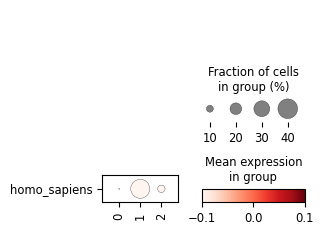

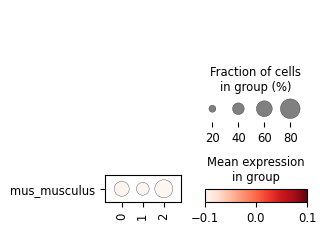

In [211]:
import scanpy as sc

# Verify the columns in adata_mus.var
print(adata_mus.var.columns)

# Use the correct column name for var_names
sc.pl.dotplot(
    adata_homo,
    var_names=adata_homo.var.index.tolist(),  # Use the index if it contains the feature IDs
    groupby='species',
    standard_scale='var'
)
sc.pl.dotplot(
    adata_mus,
    var_names=adata_mus.var.index.tolist(),  # Use the index if it contains the feature IDs
    groupby='species',
    standard_scale='var'
)

In [212]:
adata_homo.var

,soma_joinid,feature_id,feature_name,feature_type,feature_length,nnz,n_measured_obs,species
0,1062,ENSG00000000971,CFH,protein_coding,3057,6810172,105893241,homo_sapiens
1,7759,ENSG00000171860,C3AR1,protein_coding,2000,4295412,105910908,homo_sapiens
2,11952,ENSG00000197405,C5AR1,protein_coding,781,8688032,105817790,homo_sapiens


In [213]:
adata_mus.var

,soma_joinid,feature_id,feature_name,feature_type,feature_length,nnz,n_measured_obs,species
0,1029,ENSMUSG00000040552,C3AR1,protein_coding,4305,317588,42636109,mus_musculus
1,13238,ENSMUSG00000049130,C5AR1,protein_coding,2481,422091,42757016,mus_musculus
2,15169,ENSMUSG00000026365,CFH,protein_coding,3923,2085471,42776863,mus_musculus
